In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set (style="white")
#sns.set (style="whitegrid", color_codes=True)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import KFold

In [3]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

In [4]:
#Import Dataset

#Read the CSV file
Concrete_DF = pd.read_csv('concrete.csv')

In [5]:
#Univariate analysis

#Univariate analysis –data types and description of the independent attributes which should include 
#(name, range of values observed, central values (mean and median), 
#standard deviation and quartiles, analysis of the body of distributions/tails, 
#missing values, outliers, duplicates(10 Marks)

In [6]:
Concrete_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#First 15 rows
Concrete_DF.head(15)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [8]:
#Shape of data frame
Concrete_DF.shape

(1030, 9)

In [9]:
#Last 5 rows
Concrete_DF.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [10]:
#Number of unique values in each column
Concrete_DF.nunique() 

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [11]:
#Check Null values
Concrete_DF.isnull().sum() 

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
#Statistical summary
Concrete_DF.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [13]:
Summary="""
Summary:
1.	The independent variables are 
            a.	cement 
            b.	slag 
            c.	ash 
            d.	water 
            e.	superplastic 
            f.	coarseagg 
            g.	fineagg 
            h.	age
2.	The dependent variable is 
            a.	strength
3.	There are 1030 rows and 9 columns
4.	All are floats except age which is an integer.
5.	No null values found. 
"""
print(Summary)


Summary:
1.	The independent variables are 
            a.	cement 
            b.	slag 
            c.	ash 
            d.	water 
            e.	superplastic 
            f.	coarseagg 
            g.	fineagg 
            h.	age
2.	The dependent variable is 
            a.	strength
3.	There are 1030 rows and 9 columns
4.	All are floats except age which is an integer.
5.	No null values found. 



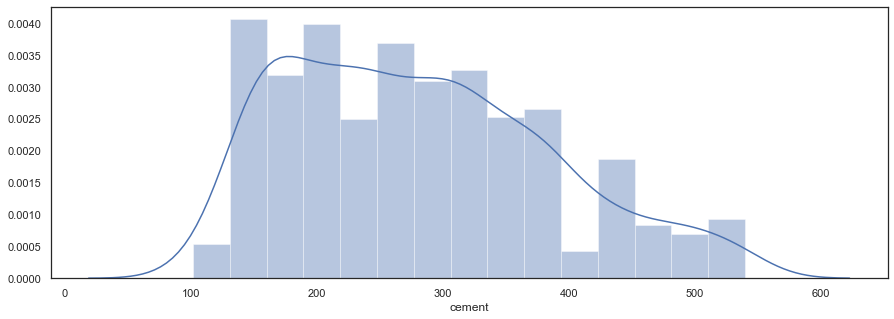

In [14]:
#Cement 
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['cement'],  kde=True);

In [15]:
#Check null
print('There are ',Concrete_DF['cement'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['cement'].median()) 

#Find the Range
print('Range    ', Concrete_DF['cement'].max() - Concrete_DF['cement'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['cement'].describe()) 

There are  0  nulls.
Median    272.9
Range     438.0
count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64


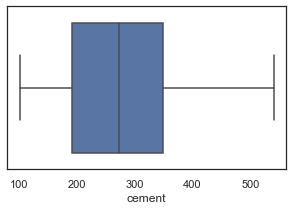

In [16]:
plt.figure(figsize=(5,3))
sns.boxplot(x='cement',data=Concrete_DF, orient='x');

In [17]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['cement'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['cement'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['cement']<outliers_lower]['cement'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['cement']>outliers_upper]['cement'].count()) 

-44.0625
586.4375
Number of outliers lower: 0
Number of outliers upper: 0


In [18]:
Analysis="""
Analysis of Cement:
•	The minimum is """ + (Concrete_DF['cement'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['cement'].describe()[['max']]).astype(int).values[0].astype(str) + """ so the spread is across
•	There is a small variance between mean and median values
•	No null values observed 
•	No outliers found
"""
print(Analysis)


Analysis of Cement:
•	The minimum is 102 and maximum is 540 so the spread is across
•	There is a small variance between mean and median values
•	No null values observed 
•	No outliers found



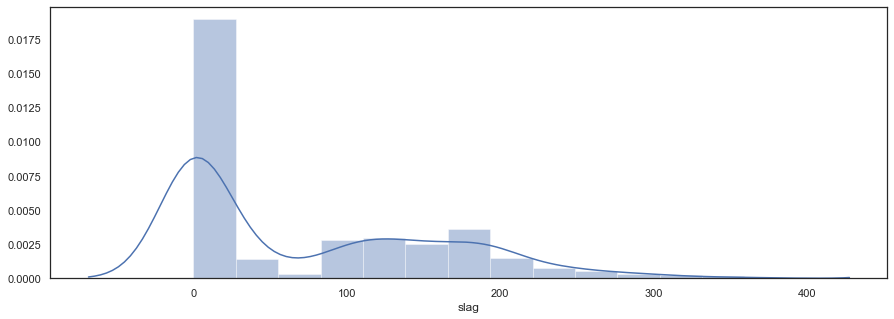

In [19]:
#Slag
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['slag']);

In [20]:
#Check null
print('There are ',Concrete_DF['slag'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['slag'].median()) 

#Find the Range
print('Range    ', Concrete_DF['slag'].max() - Concrete_DF['slag'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['slag'].describe()) 

There are  0  nulls.
Median    22.0
Range     359.4
count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64


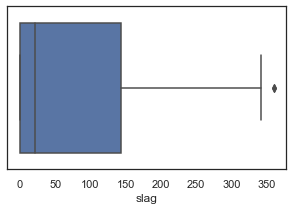

In [21]:
plt.figure(figsize=(5,3))
sns.boxplot(x='slag',data=Concrete_DF, orient='x');

In [22]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['slag'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['slag'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['slag']<outliers_lower]['slag'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['slag']>outliers_upper]['slag'].count()) 

-214.42499999999998
357.375
Number of outliers lower: 0
Number of outliers upper: 2


In [23]:
Analysis="""
Analysis of Slag:
•	The minimum is """ + (Concrete_DF['slag'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['slag'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	There is a small variance between mean and median values
•	No null values observed 
•	There 2 outliers.
"""
print(Analysis)


Analysis of Slag:
•	The minimum is 0 and maximum is 359 
•	There is a small variance between mean and median values
•	No null values observed 
•	There 2 outliers.



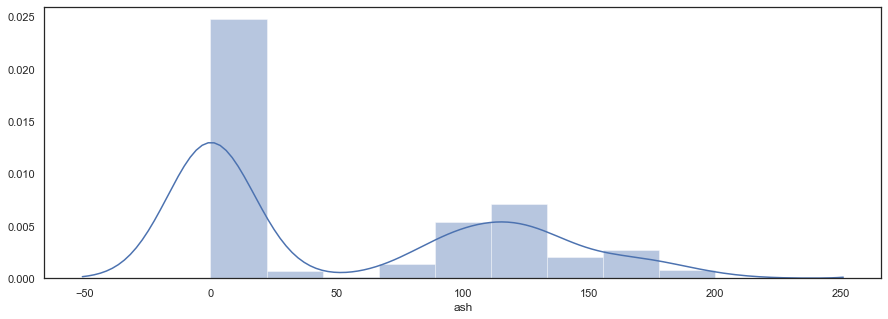

In [24]:
#Ash
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['ash']);

In [25]:
#Check null
print('There are ',Concrete_DF['ash'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['ash'].median()) 

#Find the Range
print('Range    ', Concrete_DF['ash'].max() - Concrete_DF['ash'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['ash'].describe()) 

There are  0  nulls.
Median    0.0
Range     200.1
count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64


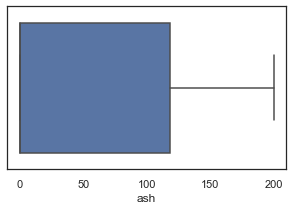

In [26]:
plt.figure(figsize=(5,3))
sns.boxplot(x='ash',data=Concrete_DF, orient='x');

In [27]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['ash'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['ash'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['ash']<outliers_lower]['ash'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['ash']>outliers_upper]['ash'].count()) 

-177.45
295.75
Number of outliers lower: 0
Number of outliers upper: 0


In [28]:
Analysis="""
Analysis of Slag:
•	The minimum is """ + (Concrete_DF['ash'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['ash'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	There is a small variance between mean and median values
•	No null values observed 
•	There are no outliers.
"""
print(Analysis)


Analysis of Slag:
•	The minimum is 0 and maximum is 200 
•	There is a small variance between mean and median values
•	No null values observed 
•	There are no outliers.



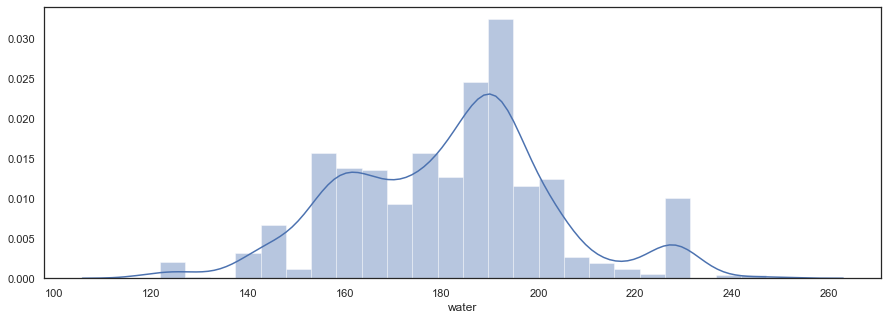

In [29]:
#Water
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['water'],  kde=True);

In [30]:
#Check null
print('There are ',Concrete_DF['water'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['water'].median()) 

#Find the Range
print('Range    ', Concrete_DF['water'].max() - Concrete_DF['water'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['water'].describe()) 

There are  0  nulls.
Median    185.0
Range     125.2
count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64


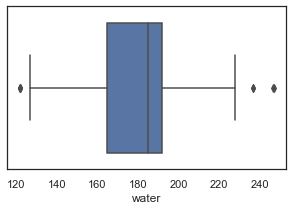

In [31]:
plt.figure(figsize=(5,3))
sns.boxplot(x='water',data=Concrete_DF, orient='x');

In [32]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['water'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['water'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['water']<outliers_lower]['water'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['water']>outliers_upper]['water'].count()) 

124.25000000000001
232.64999999999998
Number of outliers lower: 5
Number of outliers upper: 4


In [33]:
Analysis="""
Analysis of Water:
•	The minimum is """ + (Concrete_DF['water'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['water'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	There is a small variance between mean and median values
•	No null values observed 
•	There are small number of outliers.
"""
print(Analysis)


Analysis of Water:
•	The minimum is 121 and maximum is 247 
•	There is a small variance between mean and median values
•	No null values observed 
•	There are small number of outliers.



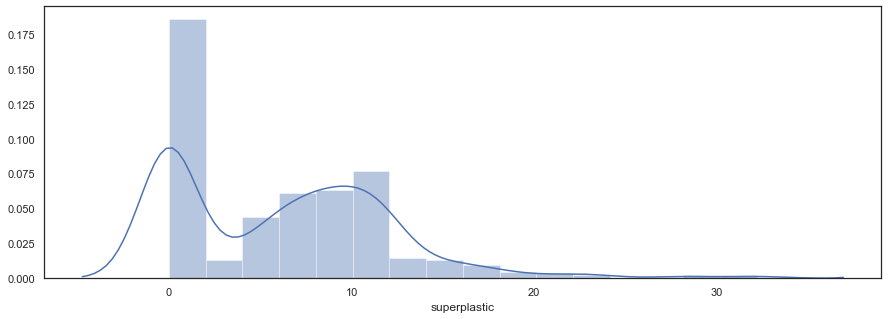

In [34]:
#Superplastic
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['superplastic'],  kde=True);

In [35]:
#Check null
print('There are ',Concrete_DF['superplastic'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['superplastic'].median()) 

#Find the Range
print('Range    ', Concrete_DF['superplastic'].max() - Concrete_DF['superplastic'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['superplastic'].describe()) 

There are  0  nulls.
Median    6.4
Range     32.2
count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64


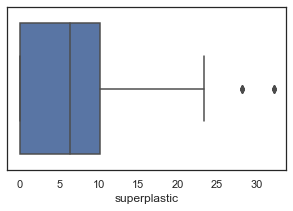

In [36]:
plt.figure(figsize=(5,3))
sns.boxplot(x='superplastic',data=Concrete_DF, orient='x');

In [37]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['superplastic'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['superplastic'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['superplastic']<outliers_lower]['superplastic'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['superplastic']>outliers_upper]['superplastic'].count()) 

-15.299999999999999
25.5
Number of outliers lower: 0
Number of outliers upper: 10


In [38]:
Analysis="""
Analysis of Superplatic:
•	The minimum is """ + (Concrete_DF['superplastic'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['superplastic'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	The Mean and median values are almost same
•	No null values observed 
•	There are small number of outliers.
"""
print(Analysis)


Analysis of Superplatic:
•	The minimum is 0 and maximum is 32 
•	The Mean and median values are almost same
•	No null values observed 
•	There are small number of outliers.



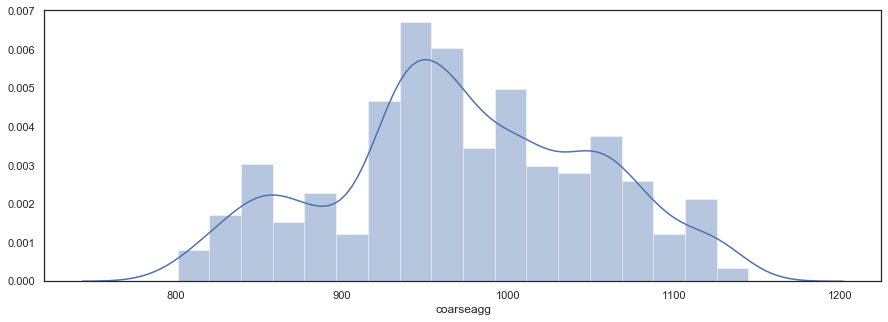

In [39]:
#Coarseagg
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['coarseagg'],  kde=True);

In [40]:
#Check null
print('There are ',Concrete_DF['coarseagg'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['coarseagg'].median()) 

#Find the Range
print('Range    ', Concrete_DF['coarseagg'].max() - Concrete_DF['coarseagg'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['coarseagg'].describe()) 

There are  0  nulls.
Median    968.0
Range     344.0
count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64


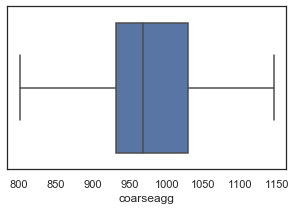

In [41]:
plt.figure(figsize=(5,3))
sns.boxplot(x='coarseagg',data=Concrete_DF, orient='x');

In [42]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['coarseagg'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['coarseagg'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['coarseagg']<outliers_lower]['coarseagg'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['coarseagg']>outliers_upper]['coarseagg'].count()) 

785.8999999999999
1175.5000000000002
Number of outliers lower: 0
Number of outliers upper: 0


In [43]:
Analysis="""
Analysis of Coarseagg: 
•	The minimum is """ + (Concrete_DF['coarseagg'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['coarseagg'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	The Mean and median values are almost same
•	No null values observed 
•	There are no outliers.
"""
print(Analysis)


Analysis of Coarseagg: 
•	The minimum is 801 and maximum is 1145 
•	The Mean and median values are almost same
•	No null values observed 
•	There are no outliers.



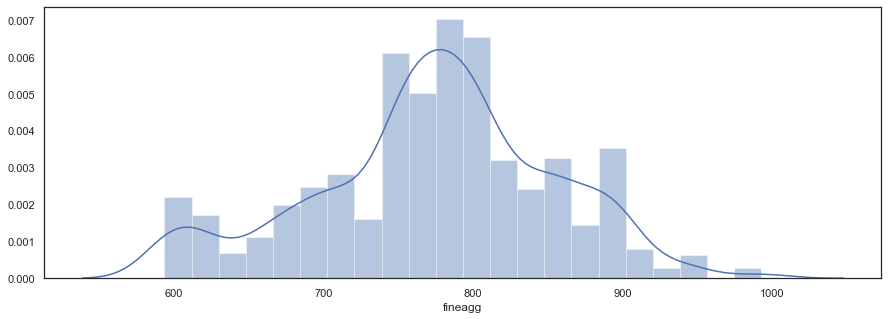

In [44]:
#Fineagg
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['fineagg'],  kde=True);

In [45]:
#Check null
print('There are ',Concrete_DF['fineagg'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['fineagg'].median()) 

#Find the Range
print('Range    ', Concrete_DF['fineagg'].max() - Concrete_DF['fineagg'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['fineagg'].describe()) 

There are  0  nulls.
Median    779.5
Range     398.6
count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64


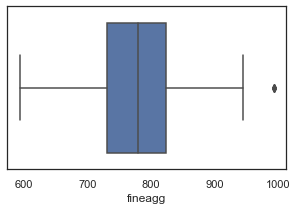

In [46]:
plt.figure(figsize=(5,3))
sns.boxplot(x='fineagg',data=Concrete_DF, orient='x');

In [47]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['fineagg'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['fineagg'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['fineagg']<outliers_lower]['fineagg'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['fineagg']>outliers_upper]['fineagg'].count()) 

591.3749999999998
963.575
Number of outliers lower: 0
Number of outliers upper: 5


In [48]:
Analysis="""
Analysis of Fineagg: 
•	The minimum is """ + (Concrete_DF['fineagg'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['fineagg'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	The Mean and median values are almost same
•	No null values observed 
•	There are small number of outliers.
"""
print(Analysis)


Analysis of Fineagg: 
•	The minimum is 594 and maximum is 992 
•	The Mean and median values are almost same
•	No null values observed 
•	There are small number of outliers.



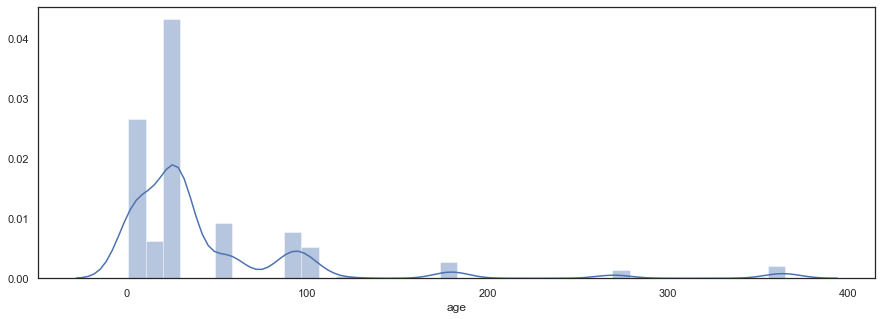

In [49]:
#Age
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['age'],  kde=True);

In [50]:
#Check null
print('There are ',Concrete_DF['age'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['age'].median()) 

#Find the Range
print('Range    ', Concrete_DF['age'].max() - Concrete_DF['age'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['age'].describe()) 

There are  0  nulls.
Median    28.0
Range     364
count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64


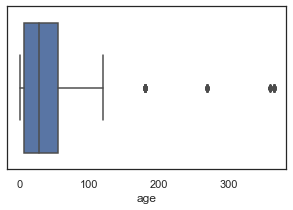

In [51]:
plt.figure(figsize=(5,3))
sns.boxplot(x='age',data=Concrete_DF, orient='x');

In [52]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['age'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['age'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['age']<outliers_lower]['age'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['age']>outliers_upper]['age'].count()) 

-66.5
129.5
Number of outliers lower: 0
Number of outliers upper: 59


In [53]:
Analysis="""
Analysis of Age: 
•	The minimum is """ + (Concrete_DF['age'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['age'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	There is small variance between Mean and median values.
•	No null values observed 
•	There are 59 outliers 
•	Data is right skewed
"""
print(Analysis)


Analysis of Age: 
•	The minimum is 1 and maximum is 365 
•	There is small variance between Mean and median values.
•	No null values observed 
•	There are 59 outliers 
•	Data is right skewed



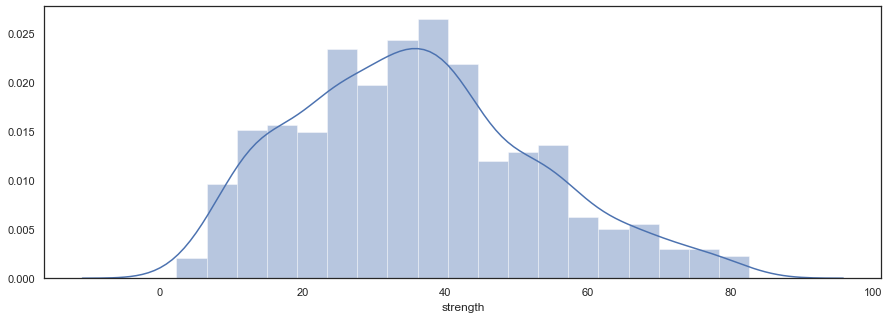

In [54]:
#Strength
plt.figure(figsize=(15,5))
sns.distplot(Concrete_DF['strength'],  kde=True);

In [55]:
print('There are ',Concrete_DF['strength'].isnull().sum(),' nulls.')

#Median value
print('Median   ',Concrete_DF['strength'].median()) 

#Find the Range
print('Range    ', Concrete_DF['strength'].max() - Concrete_DF['strength'].min()) 

#Check mean,min, max, std, quartiles
print(Concrete_DF['strength'].describe()) 

There are  0  nulls.
Median    34.445
Range     80.27
count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64


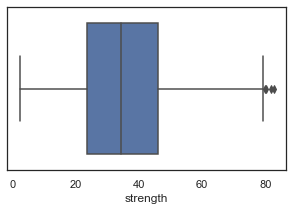

In [56]:
plt.figure(figsize=(5,3))
sns.boxplot(x='strength',data=Concrete_DF, orient='x');

In [57]:
#Q1 and Q3 values from above
Q1 = (Concrete_DF['strength'].describe()[['25%']]).astype(float).values[0]
Q3 = (Concrete_DF['strength'].describe()[['75%']]).astype(float).values[0]

outliers_lower=Q1 - 1.5*(Q3 - Q1)
outliers_upper=Q3 + 1.5*(Q3 - Q1)

print(outliers_lower)
print(outliers_upper)

#Number of outliers
#Lower
print('Number of outliers lower:',Concrete_DF[Concrete_DF['strength']<outliers_lower]['strength'].count()) 
#Upper
print('Number of outliers upper:',Concrete_DF[Concrete_DF['strength']>outliers_upper]['strength'].count()) 

-9.927500000000013
79.77250000000001
Number of outliers lower: 0
Number of outliers upper: 4


In [58]:
Analysis="""
Analysis of Strength: 
•	The minimum is """ + (Concrete_DF['strength'].describe()[['min']]).astype(int).values[0].astype(str) + """ and maximum is """ + (Concrete_DF['strength'].describe()[['max']]).astype(int).values[0].astype(str) + """ 
•	There is a variable between Mean and median values.
•	No null values observed 
•	There are small number of outliers 
"""
print(Analysis)


Analysis of Strength: 
•	The minimum is 2 and maximum is 82 
•	There is a variable between Mean and median values.
•	No null values observed 
•	There are small number of outliers 



In [59]:
#Outliers
print('Outliers:')
print('We see small number of outliers in above analysis, therefore we can leave them.')

Outliers:
We see small number of outliers in above analysis, therefore we can leave them.


In [60]:
#Duplicates
Concrete_DF_O =Concrete_DF
Concrete_DF_O.shape

(1030, 9)

In [61]:
#Check duplicate rows
print('Duplicate Rows:')
print(Concrete_DF[Concrete_DF.duplicated()])

Duplicate Rows:
     cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
468   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
482   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
493   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
517   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
525   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
527   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
576   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
577   425.0  106.3  0.0  153.5     

In [62]:
#Droping duplicate rows
Concrete_DF=Concrete_DF.drop_duplicates()
Concrete_DF.shape

(1005, 9)

In [63]:
#Bi-variate analysis

#Bi-variate analysis between the predictor variables and between the predictor variables and target column. 
#Comment on your findings in terms of their relationship and degree of relation if any. 
#Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)

<Figure size 1440x360 with 0 Axes>

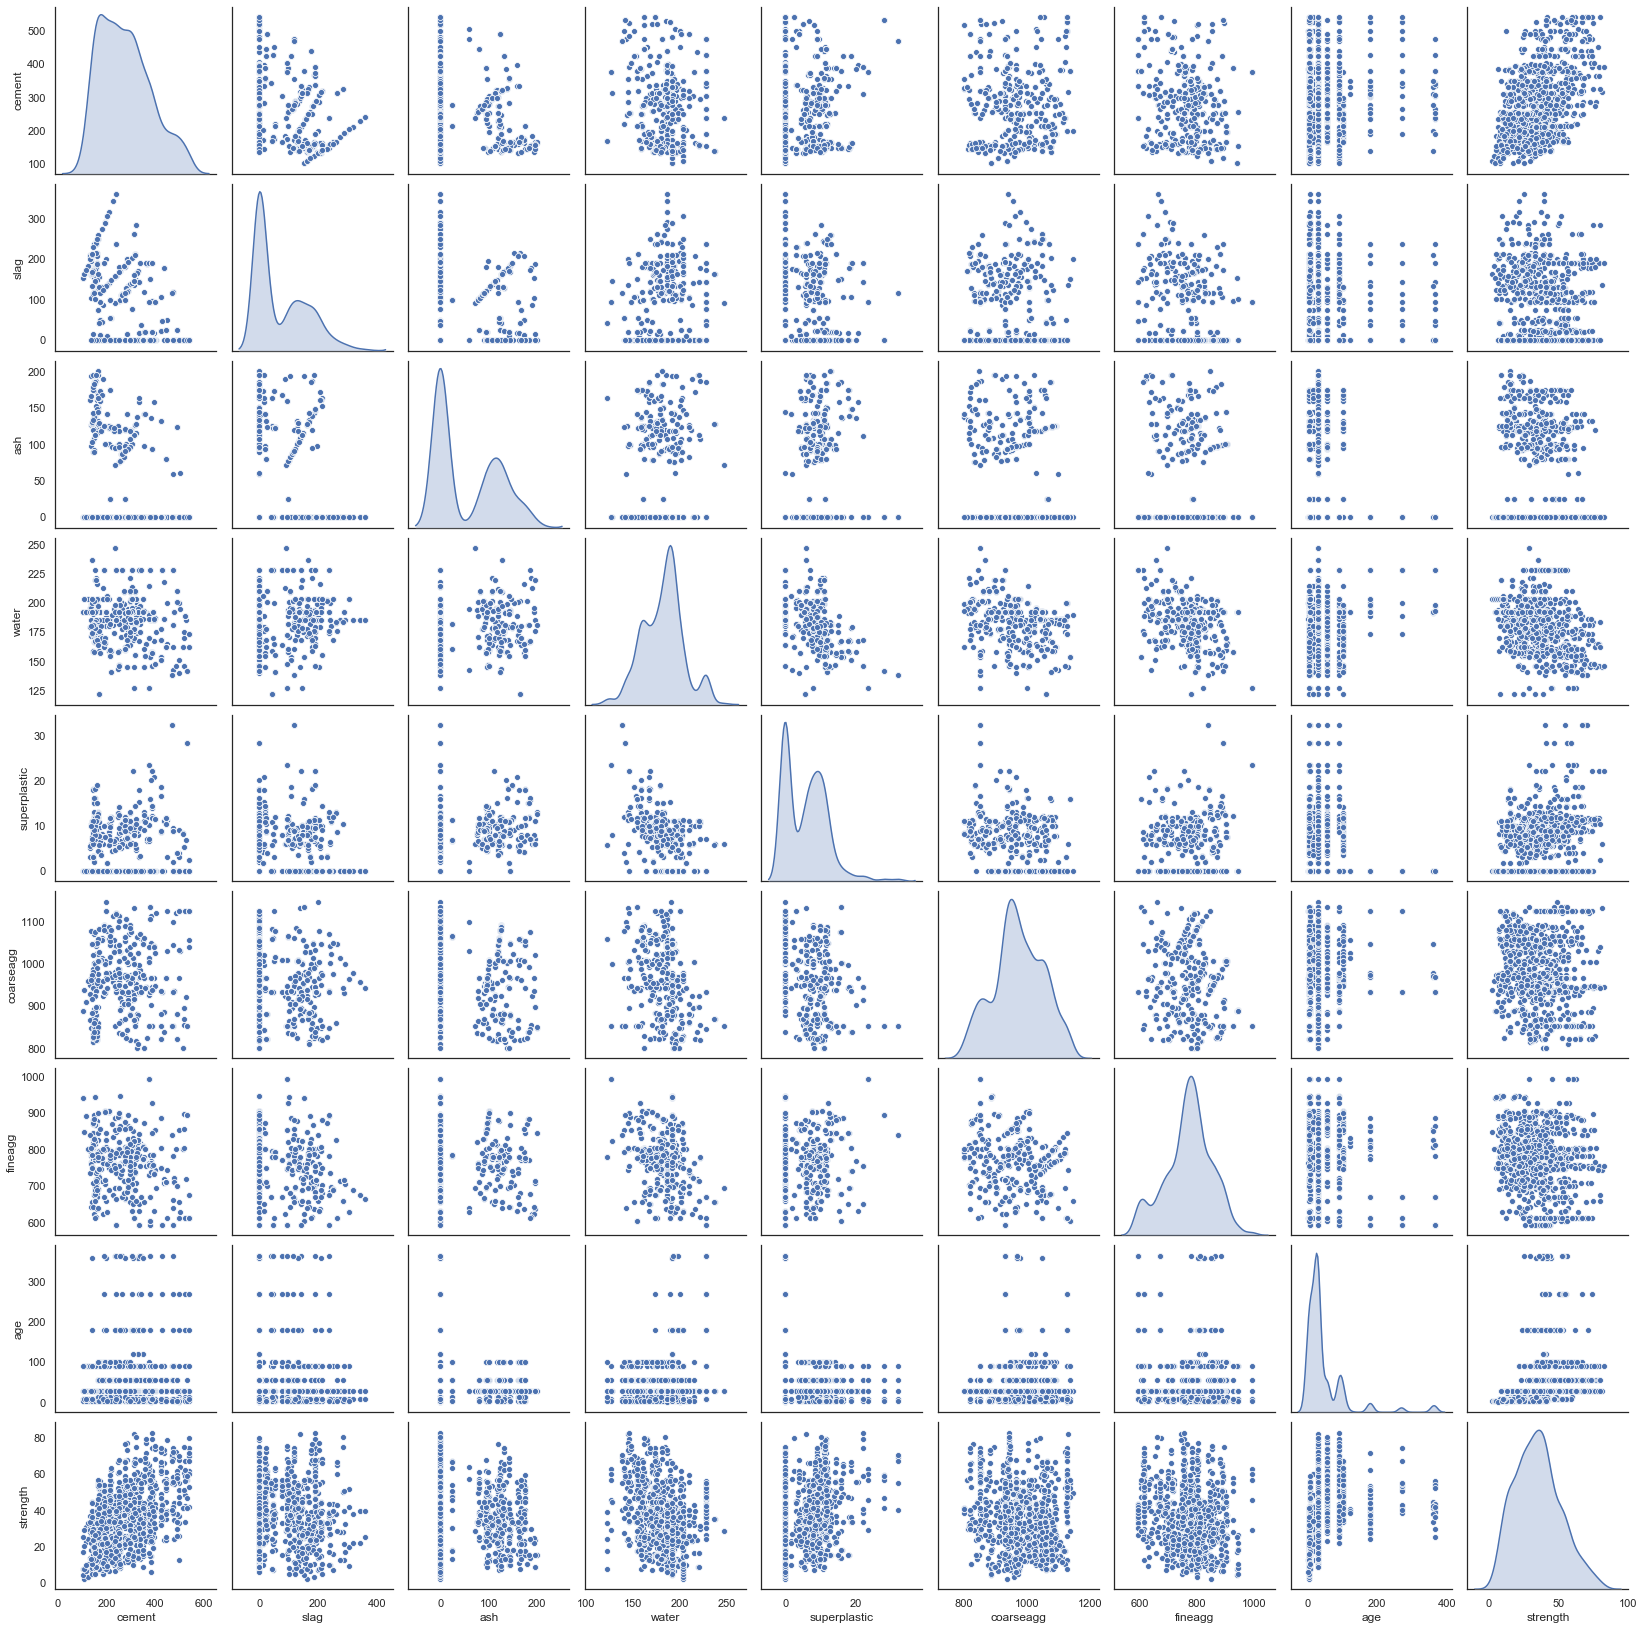

In [64]:
plt.figure(figsize=(20,5))
sns.pairplot(Concrete_DF, diag_kind='kde')
plt.show();

In [65]:
Analysis='''
•	 Cement does not show any relation with slag, ash, water, superplatic, coarseagg, fineagg and age.
•	 Slag does not show any relation with ash, water, superplatic, coarseagg, fineagg and age.
•	 Ash does not show any relation with water, superplatic, coarseagg, fineagg and age.
•	 Water shows -negative linear relationship with superplastic and fineagg while no relationship with others.
•	 Superplastic shows negative linear relationship with water and does not show any relationship with others.
•	 Coarseagg does not show any relation with any other columns.
•	 Fineagg has negative linear relationship with water and it does not show any relation with any others.
'''
print(Analysis)


•	 Cement does not show any relation with slag, ash, water, superplatic, coarseagg, fineagg and age.
•	 Slag does not show any relation with ash, water, superplatic, coarseagg, fineagg and age.
•	 Ash does not show any relation with water, superplatic, coarseagg, fineagg and age.
•	 Water shows -negative linear relationship with superplastic and fineagg while no relationship with others.
•	 Superplastic shows negative linear relationship with water and does not show any relationship with others.
•	 Coarseagg does not show any relation with any other columns.
•	 Fineagg has negative linear relationship with water and it does not show any relation with any others.



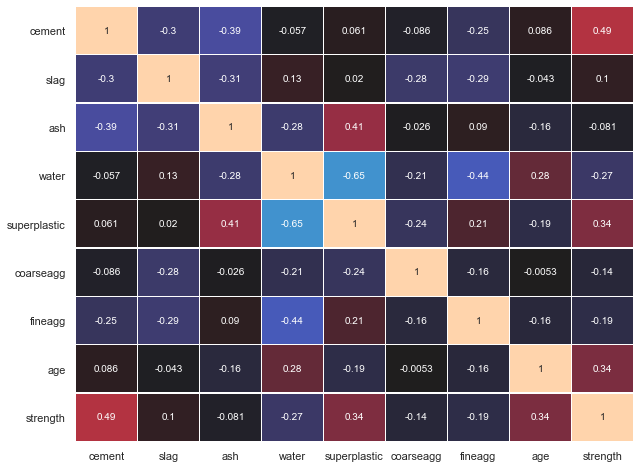

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(Concrete_DF.corr(),
annot=True,
linewidths=.5,
center=0,
cbar=False)
plt.show();

In [67]:
Analysis='''
•	 There is a negative relationship between water with superplastic and fineagg
•	 There is a positive relationship between superplastic and ash
•	 There is a positive relationship between superplastic and fineagg
•	 There is a positive relation between age, cement, superplastic and strength
•	 There is a negative relation between water, fineagg, coarseagg and strength
'''
print(Analysis)


•	 There is a negative relationship between water with superplastic and fineagg
•	 There is a positive relationship between superplastic and ash
•	 There is a positive relationship between superplastic and fineagg
•	 There is a positive relation between age, cement, superplastic and strength
•	 There is a negative relation between water, fineagg, coarseagg and strength



Cement and strength are positively and linearly related. For a given value of cement, we see multiple values for strength. Therefore, cement will not be a good predictor.


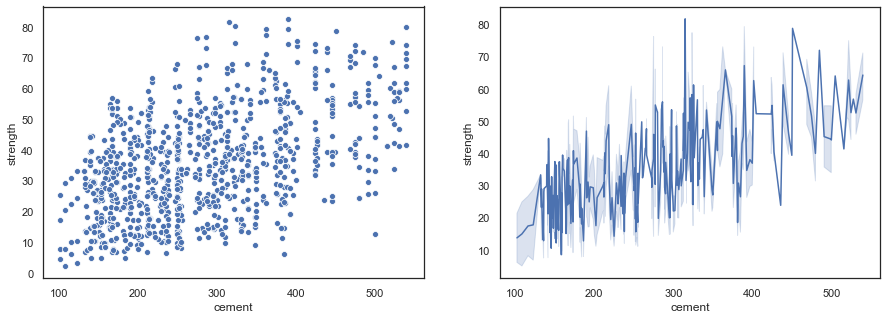

In [68]:
#Strength vs Cement
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='cement', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='cement',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('Cement and strength are positively and linearly related. For a given value of cement, we see multiple values for strength. Therefore, cement will not be a good predictor.')

In slag and strength we do not see any trend, the values are scattered.


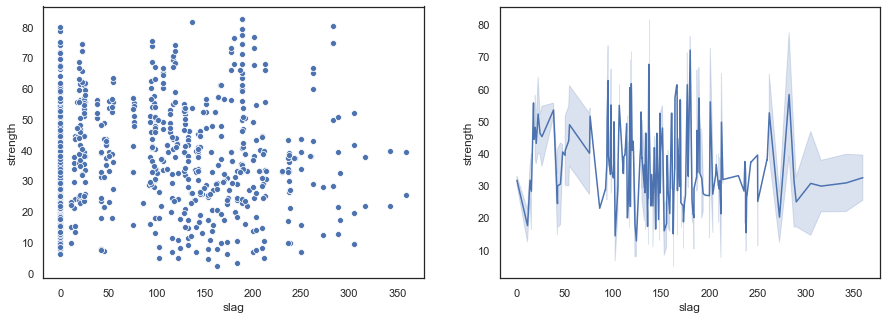

In [69]:
#Strength vs Slag
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='slag', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='slag',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('In slag and strength we do not see any trend, the values are scattered.')

In ash and strength we do not see any trend.


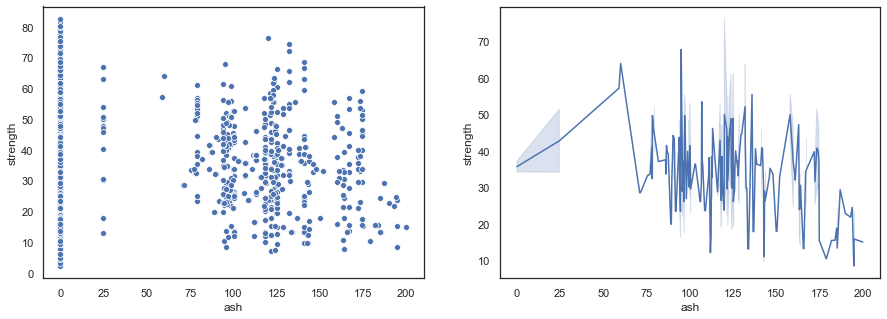

In [70]:
#Strength vs Ash
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='ash', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='ash',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('In ash and strength we do not see any trend.')

In water and strength we do not see any trend.


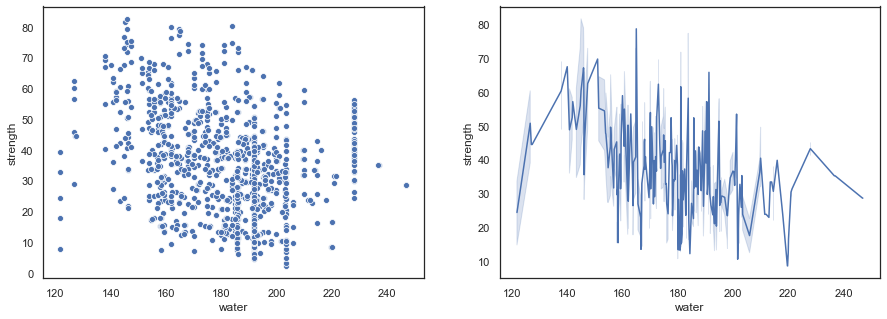

In [71]:
#Strength vs Water
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='water', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='water',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('In water and strength we do not see any trend.')

In superplastic and strength we do not see any trend.


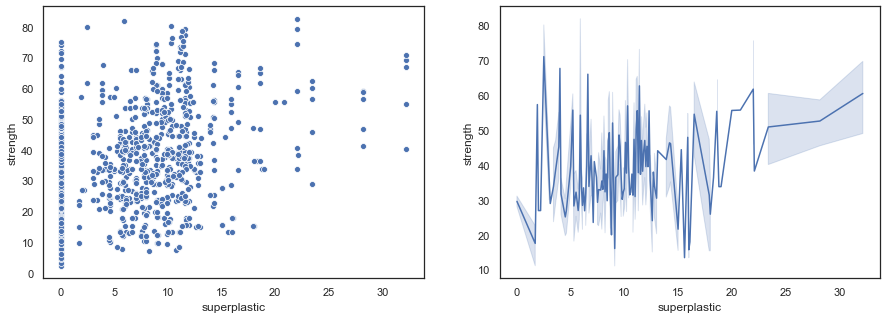

In [72]:
#Strength vs Superplastic
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='superplastic', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='superplastic',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('In superplastic and strength we do not see any trend.')

In coarseagg and strength we do not see any trend.


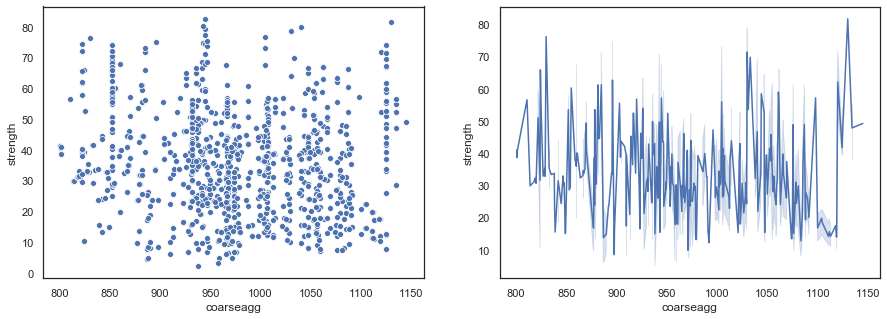

In [73]:
#Strength vs Coarseagg
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='coarseagg', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='coarseagg',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('In coarseagg and strength we do not see any trend.')

In fineagg and strength we do not see any trend.


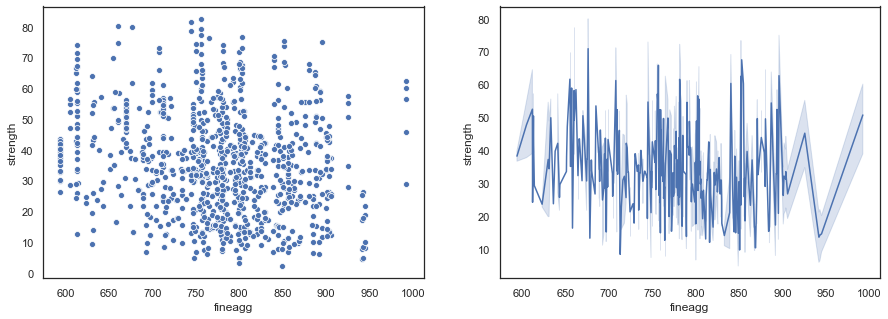

In [74]:
#Strength vs Fineagg
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='fineagg', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='fineagg',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('In fineagg and strength we do not see any trend.')

For a value of age there are many values of strength. Therefore, it is not a good predictor for strength.


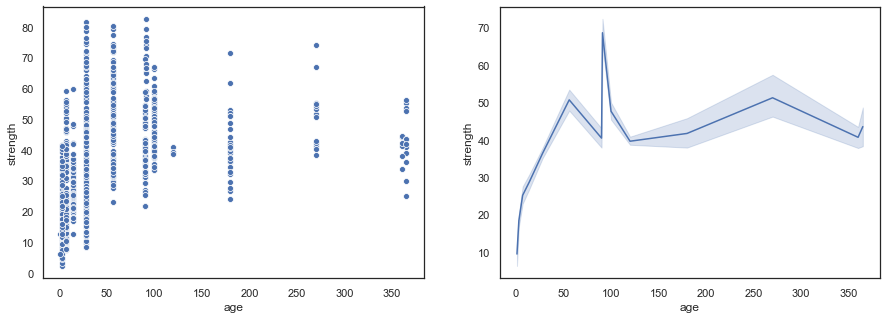

In [75]:
#Strength vs Age
fig, (fx1,fx2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='age', y='strength', data=Concrete_DF, ax=fx1, palette="deep");
sns.lineplot(x='age',y='strength', data=Concrete_DF, ax=fx2, palette="deep");
print('For a value of age there are many values of strength. Therefore, it is not a good predictor for strength.')

In [76]:
print('Note: None of the independent attributes are good predictors of strength. There is no linear relationship between them. Therefore, linear model will not be a good option.')

Note: None of the independent attributes are good predictors of strength. There is no linear relationship between them. Therefore, linear model will not be a good option.


In [77]:
#Feature Engineering techniques(10 marks)

#Identify opportunities (if any) to extract new features from existing features, 
#drop a feature(if required) Hint: Feature Extraction, 
#for example, consider a dataset with two features length and breadth. 
#From this, we can extract a new feature Area which would be length * breadth.

#Get the data model ready and do a train test split.

#Decide on the complexity of the model, should it be a simple linear model in terms 
#of parameters or would a quadratic or higher degree.

In [78]:
# Using z score for scaling as age is in different unit
std_scale = StandardScaler()
Concrete_DF = Concrete_DF.apply(zscore)
Concrete_DF['age'] = std_scale.fit_transform(Concrete_DF[['age']])

In [79]:
#Independent variables
x=Concrete_DF.drop('strength',axis=1)

#Dependent variable
y=Concrete_DF['strength'] 

features = [col for col in Concrete_DF.columns if col != 'strength']

In [80]:
#Split data in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

In [81]:
#Random Forest

DF_rf = RandomForestRegressor()
DF_rf.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
y_predict = DF_rf.predict(x_test)

In [83]:
#Performance on train data
print("Train: %.2f" % DF_rf.score(x_train, y_train))

#Performance on test data
print("Test: %.2f" % DF_rf.score(x_test, y_test)) 

var_accuracy=metrics.r2_score(y_test, y_predict)
var_rmse=np.sqrt(mean_squared_error(y_test, y_predict))

print("Accuracy Score: %.2f" %var_accuracy)
print("RMSE: %.2f" %var_rmse)
print("This is an overfitting model with accuracy in train data and significantly lower score on test data.")

Train: 0.98
Test: 0.90
Accuracy Score: 0.90
RMSE: 0.30
This is an overfitting model with accuracy in train data and significantly lower score on test data.


In [84]:
#Save the results for each model in a dataframe for comparision
resultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': var_accuracy, 'RMSE': var_rmse},index={'1'})
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785


In [85]:
#Creating the Model and Tuning It Pt1:
#Algorithms that you think will be suitable for this project. 
#Use Kfold Cross-Validation to evaluate model performance. 
#Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)

#K-Fold Cross Validation -Random Forest

num_folds = 5
seed = 22
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(DF_rf,x, y, cv=kfold)
var_accuracy=np.mean(abs(results))
print('Average accuracy: ',var_accuracy)
print('Standard Deviation: ',results.std())

Average accuracy:  0.9055583773852535
Standard Deviation:  0.022906189610478068


In [86]:
tempResultsDf = pd.DataFrame({'Method':['K-Fold Random Forest'], 'Accuracy': [
var_accuracy], 'RMSE': [var_rmse]},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785


In [87]:
#Bagging
bg_DF = BaggingRegressor()
bg_DF.fit(x_train, y_train)

BaggingRegressor()

In [88]:
#Get predicted
y_predict = bg_DF.predict(x_test)

In [89]:
#Performance on train data
print("Train: %.2f" % bg_DF.score(x_train, y_train)) 

#Performance on test data
print("Test: %.2f" % bg_DF.score(x_test, y_test)) 

var_accuracy=metrics.r2_score(y_test, y_predict)
var_rmse=np.sqrt(mean_squared_error(y_test, y_predict))

print("Accuracy Score: %.2f" %var_accuracy)
print("RMSE: %.2f" %var_rmse)
print("This is also an overfit model")

Train: 0.97
Test: 0.88
Accuracy Score: 0.88
RMSE: 0.32
This is also an overfit model


In [90]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432


In [91]:
#Creating the Model and Tuning It Pt1:
#Algorithms that you think will be suitable for this project. 
#Use Kfold Cross-Validation to evaluate model performance. 
#Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)

#K-Fold Cross Validation -Bagging
num_folds = 5
seed = 22
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(bg_DF,x, y, cv=kfold)
var_accuracy=np.mean(abs(results))
print('Average accuracy: ',var_accuracy)
print('Standard Deviation: ',results.std())

Average accuracy:  0.8948344912438374
Standard Deviation:  0.024437516750287894


In [92]:
tempResultsDf = pd.DataFrame({'Method':['K-Fold Bagging'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'4'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432
4,K-Fold Bagging,0.894834,0.322432


In [93]:
#Adaboost
ab_DF = AdaBoostRegressor()
ab_DF.fit(x_train, y_train)

AdaBoostRegressor()

In [94]:
#Get predicted
y_predict = ab_DF.predict(x_test)

In [95]:
#Performance on train data
print("Train: %.2f" % ab_DF.score(x_train, y_train))

#Performance on test data
print("Test: %.2f" % ab_DF.score(x_test, y_test)) 

var_accuracy=metrics.r2_score(y_test, y_predict)
var_rmse=np.sqrt(mean_squared_error(y_test, y_predict))

print("Accuracy Score: %.2f" %var_accuracy)
print("RMSE: %.2f" %var_rmse)
print("This is also an overfit model")

Train: 0.82
Test: 0.76
Accuracy Score: 0.76
RMSE: 0.46
This is also an overfit model


In [96]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'5'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432
4,K-Fold Bagging,0.894834,0.322432
5,Adaboost,0.763493,0.455461


In [97]:
#Creating the Model and Tuning It Pt1:
#Algorithms that you think will be suitable for this project. 
#Use Kfold Cross-Validation to evaluate model performance. 
#Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)

#K-Fold Cross Validation -Adaboost
num_folds = 5
seed = 22
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(ab_DF,x, y, cv=kfold)
var_accuracy=np.mean(abs(results))
print('Average accuracy: ',var_accuracy)
print('Standard Deviation: ',results.std())

Average accuracy:  0.7795593120700556
Standard Deviation:  0.028333906990989626


In [98]:
tempResultsDf = pd.DataFrame({'Method':['K-Fold Adaboost'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'6'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432
4,K-Fold Bagging,0.894834,0.322432
5,Adaboost,0.763493,0.455461
6,K-Fold Adaboost,0.779559,0.455461


In [99]:
print('''
From above we see that 
•	Random Forest and K-Fold Random Forest
•	Bagging and K-Fold Bagging
Have better results. Therefore we will select them for Hyperparameter tuning
''')


From above we see that 
•	Random Forest and K-Fold Random Forest
•	Bagging and K-Fold Bagging
Have better results. Therefore we will select them for Hyperparameter tuning



In [100]:
#Creating the Model and Tuning It Pt2:
#Techniques employed to squeeze that extra performance out of the model without making it overfit. 
#Use Grid Search or Random Search on any of the two models used above. 
#Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [101]:
#Preparing param distributions

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

#Method of selecting samples for training each tree

#Create the random grid
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [102]:
#Randomized search for Random Forest
rf_DF = RandomForestRegressor()

# Fit the random search model
rf_random_DF = RandomizedSearchCV(estimator = rf_DF, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)

rf_random_DF.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=1, verbose=2)

In [103]:
#Best random parameters
rf_random_DF.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [104]:
y_predict = rf_random_DF.predict(x_test)

In [105]:
#Performance on train data
print("Train: %.2f" % rf_random_DF.score(x_train, y_train)) 

#Performance on test data
print("Test: %.2f" % rf_random_DF.score(x_test, y_test)) 

var_accuracy=metrics.r2_score(y_test, y_predict)
var_rmse=np.sqrt(mean_squared_error(y_test, y_predict))

print("Accuracy Score: %.2f" %var_accuracy)
print("RMSE: %.2f" %var_rmse)

Train: 0.98
Test: 0.90
Accuracy Score: 0.90
RMSE: 0.30


In [106]:
tempResultsDf = pd.DataFrame({'Method':['RandomSearch Random Forest'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'7'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432
4,K-Fold Bagging,0.894834,0.322432
5,Adaboost,0.763493,0.455461
6,K-Fold Adaboost,0.779559,0.455461
7,RandomSearch Random Forest,0.897783,0.299427


In [107]:
#K-Fold Cross Validation -RandomSearch Random Forest
results = cross_val_score(rf_random_DF,x, y, cv=5)
var_accuracy=np.mean(abs(results))

print('Average accuracy: ',var_accuracy)
print('Standard Deviation: ',results.std())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.4s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.9s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.7s finished


Average accuracy:  0.9017259995093022
Standard Deviation:  0.02532479362315365


In [108]:
tempResultsDf = pd.DataFrame({'Method':['K-Fold RandomSearch Random Forest'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'8'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432
4,K-Fold Bagging,0.894834,0.322432
5,Adaboost,0.763493,0.455461
6,K-Fold Adaboost,0.779559,0.455461
7,RandomSearch Random Forest,0.897783,0.299427
8,K-Fold RandomSearch Random Forest,0.901726,0.299427


In [109]:
#Randomized search for Bagging
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'bootstrap': [True, False]}


In [110]:
bgcl_DF = BaggingRegressor()

#Fit the random search model
bgcl_random_DF = RandomizedSearchCV(estimator = bgcl_DF, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)

bgcl_random_DF.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\deval\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.1s finished


RandomizedSearchCV(cv=5, estimator=BaggingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=1, verbose=2)

In [111]:
bgcl_random_DF.best_params_

{'n_estimators': 400, 'bootstrap': True}

In [112]:
y_predict = bgcl_random_DF.predict(x_test)

In [113]:
#Performance on train data
print("Train: %.2f" % bgcl_random_DF.score(x_train, y_train)) 

#Performance on test data
print("Test: %.2f" % bgcl_random_DF.score(x_test, y_test)) 

var_accuracy=metrics.r2_score(y_test, y_predict)
var_rmse=np.sqrt(mean_squared_error(y_test, y_predict))

print("Accuracy Score: %.2f" %var_accuracy)
print("RMSE: %.2f" %var_rmse)

Train: 0.98
Test: 0.89
Accuracy Score: 0.89
RMSE: 0.30


In [114]:
tempResultsDf = pd.DataFrame({'Method':['RandomSearch Bagging'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'9'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432
4,K-Fold Bagging,0.894834,0.322432
5,Adaboost,0.763493,0.455461
6,K-Fold Adaboost,0.779559,0.455461
7,RandomSearch Random Forest,0.897783,0.299427
8,K-Fold RandomSearch Random Forest,0.901726,0.299427
9,RandomSearch Bagging,0.894488,0.304215


In [115]:
#K-Fold Cross Validation -RandomSearch Bagging
results = cross_val_score(bgcl_random_DF,x, y, cv=5)
var_accuracy=np.mean(abs(results))

print('Average accuracy: ',var_accuracy)
print('Standard Deviation: ',results.std())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\deval\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished
C:\Users\deval\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished
C:\Users\deval\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished
C:\Users\deval\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished
C:\Users\deval\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished


Average accuracy:  0.9026263662766354
Standard Deviation:  0.02336538478080437


In [116]:
tempResultsDf = pd.DataFrame({'Method':['K-Fold RandomSearch Bagging'], 'Accuracy': [var_accuracy], 'RMSE': [var_rmse]},index={'10'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'RMSE']]
resultsDf

,Method,Accuracy,RMSE
1,Random Forest,0.896166,0.301785
2,K-Fold Random Forest,0.905558,0.301785
3,Bagging,0.881473,0.322432
4,K-Fold Bagging,0.894834,0.322432
5,Adaboost,0.763493,0.455461
6,K-Fold Adaboost,0.779559,0.455461
7,RandomSearch Random Forest,0.897783,0.299427
8,K-Fold RandomSearch Random Forest,0.901726,0.299427
9,RandomSearch Bagging,0.894488,0.304215
10,K-Fold RandomSearch Bagging,0.902626,0.304215


In [117]:
print('''
Conclusion:
After using various models to predict the strength of concrete. 
Bagging and Random Forest have the lowest Root-Mean-Square Deviation (RMSE) and good score i.e. R2 ~ 90% 
which make them more suitable for this scenario. 
''')


Conclusion:
After using various models to predict the strength of concrete. 
Bagging and Random Forest have the lowest Root-Mean-Square Deviation (RMSE) and good score i.e. R2 ~ 90% 
which make them more suitable for this scenario. 

